<a href="https://colab.research.google.com/github/VickHack24/QCES/blob/main/Crop_and_Soil_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shankarpriya2913_crop_and_soil_dataset_path = kagglehub.dataset_download('shankarpriya2913/crop-and-soil-dataset')

print('Data source import complete.')
import pandas as pd
import os

# Use the downloaded path to locate your CSV
csv_path = os.path.join(shankarpriya2913_crop_and_soil_dataset_path, "data_core.csv")

# Load the CSV
df = pd.read_csv(csv_path)

print(df.head())  # Just to confirm it's loaded


Using Colab cache for faster access to the 'crop-and-soil-dataset' dataset.
Data source import complete.
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


# Crop and soil features

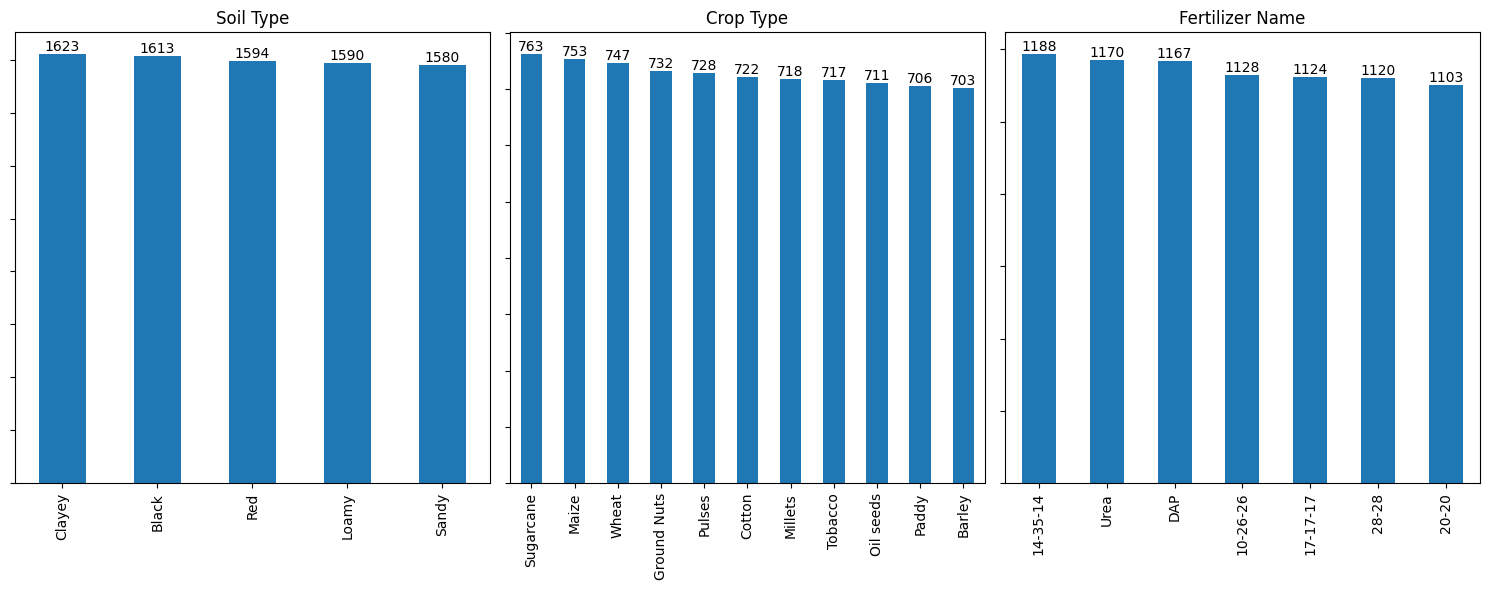

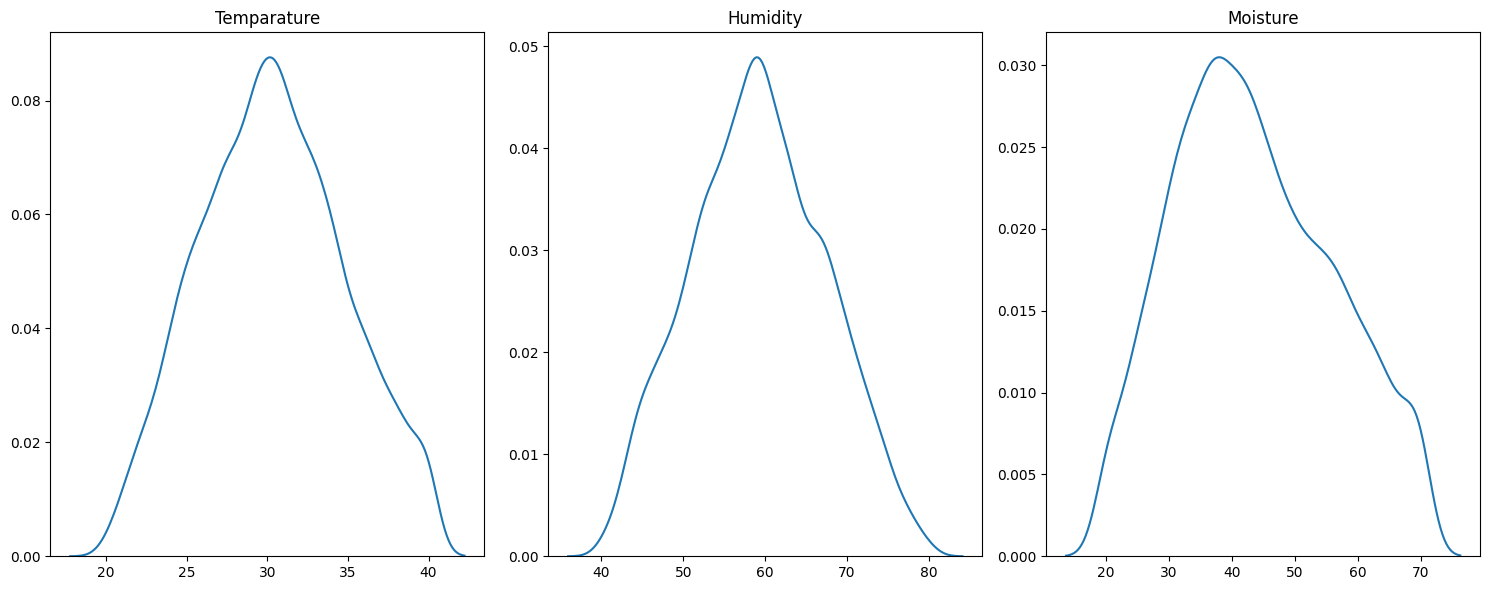

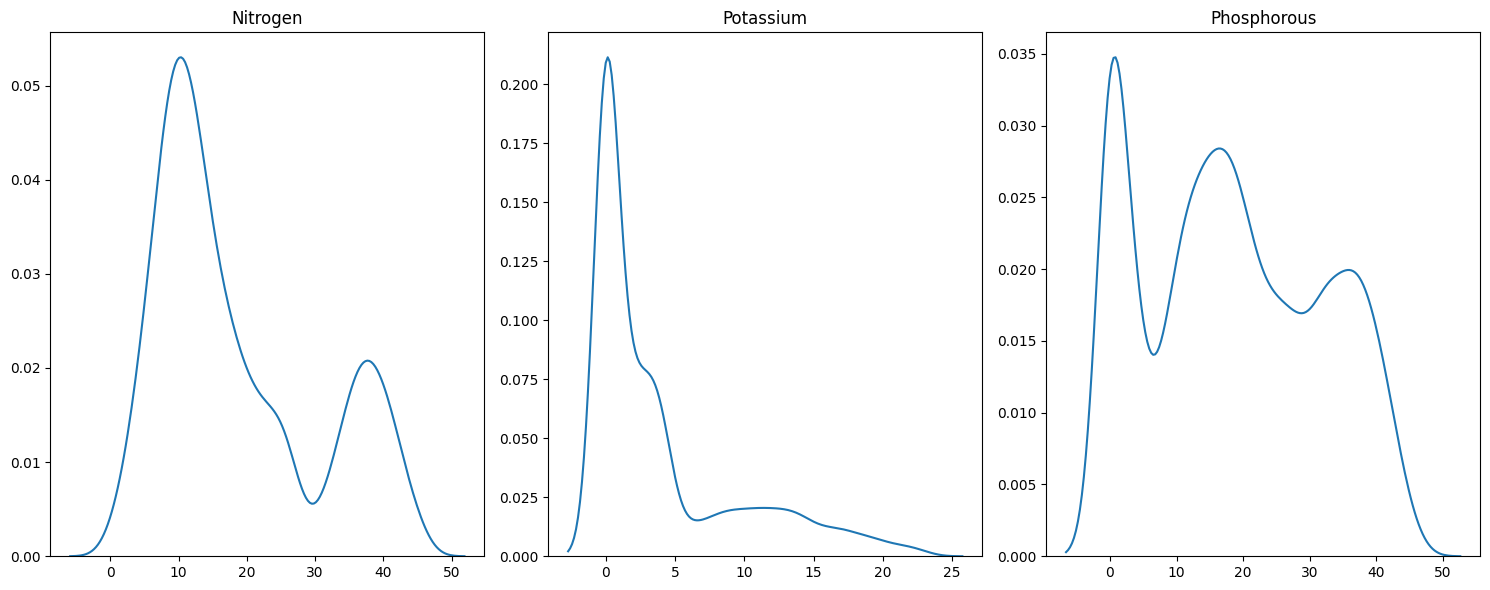

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgbc = XGBClassifier()
lgbc = LGBMClassifier(verbose=-100)

models_cl = [rfc, abc, gbc, etc,
         lgr, svc, xgbc, lgbc]

names_cl = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

def training_classification():
    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models_cl, names_cl):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
    fig, axes = plt.subplots()
    dd = pd.DataFrame({"score": scores}, index=names_cl)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])

        print("\n\n")

df = pd.read_csv(csv_path)

cats = ["Soil Type", "Crop Type", "Fertilizer Name"]
nums = [i for i in df.columns if i not in cats]

fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(cats):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        sns.kdeplot(df, x=nums[index], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Features distribution and tendencies among different soil types

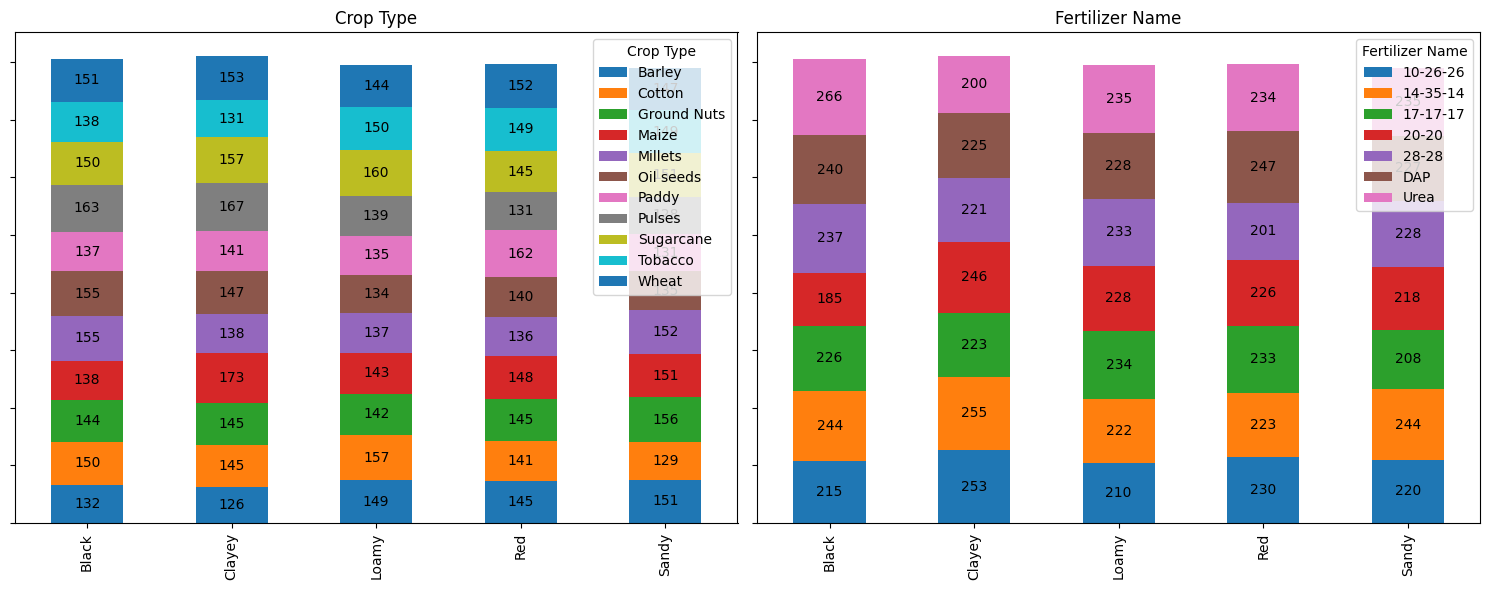

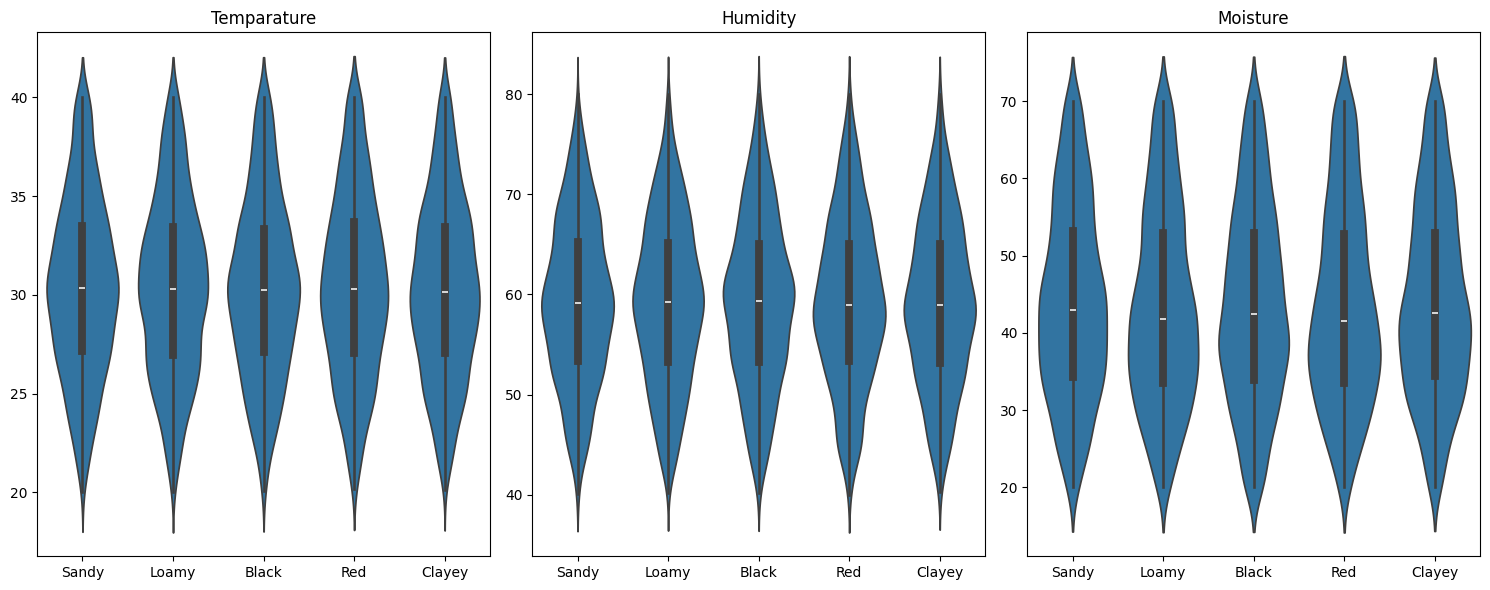

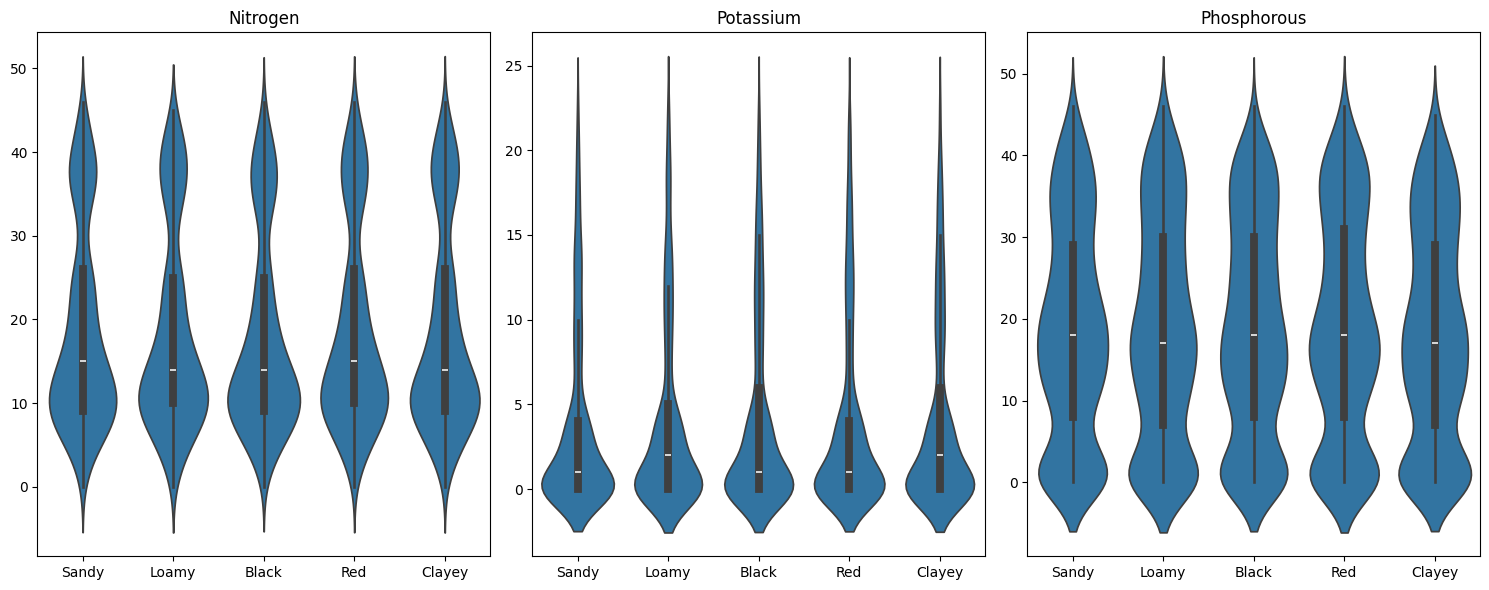

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

grouped = df.groupby(cats[0])

for i, j in enumerate([cats[1], cats[-1]]):
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    bar_labels(axes[i], 0, "center")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        sns.violinplot(df, x=cats[0], y=nums[index], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Features distribution and tendencies among different crop types

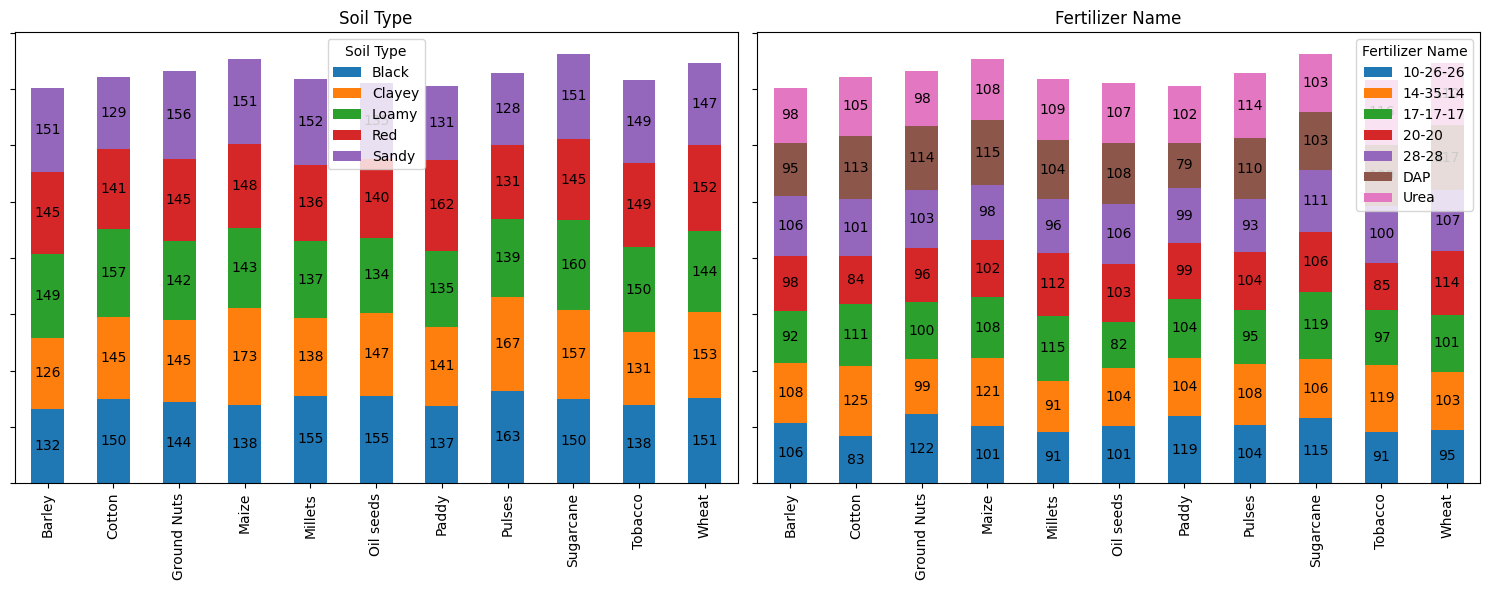

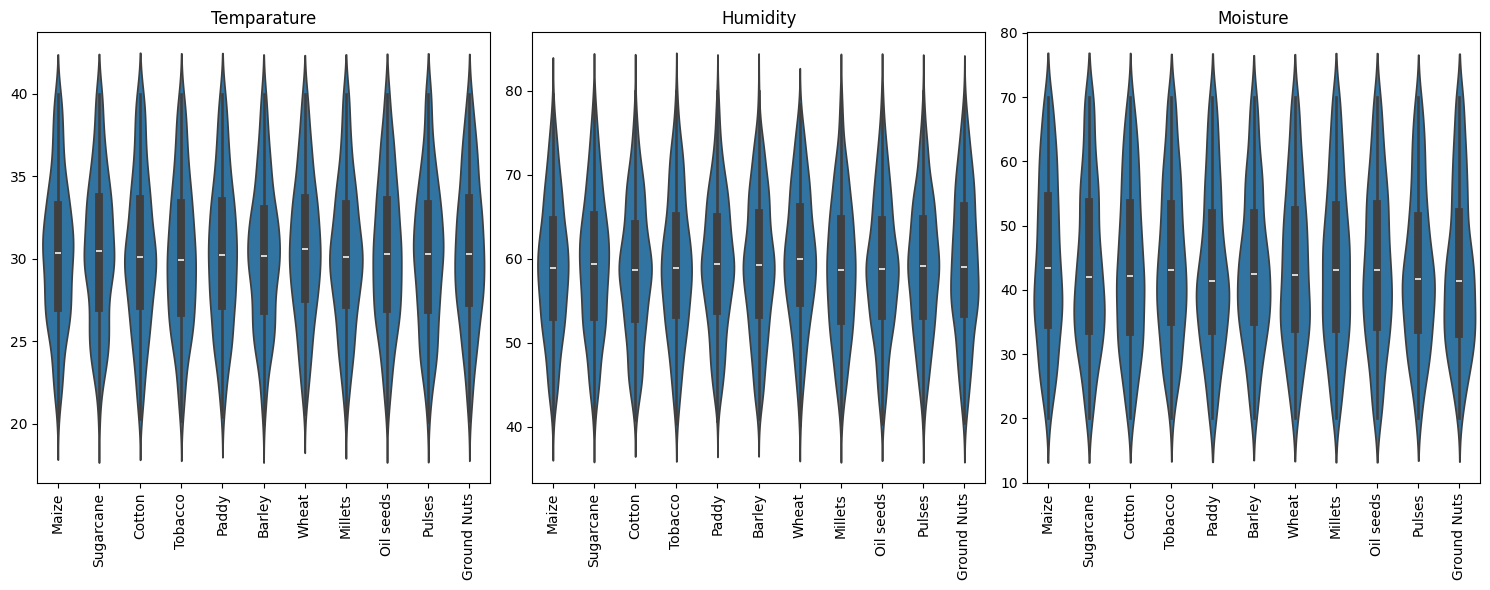

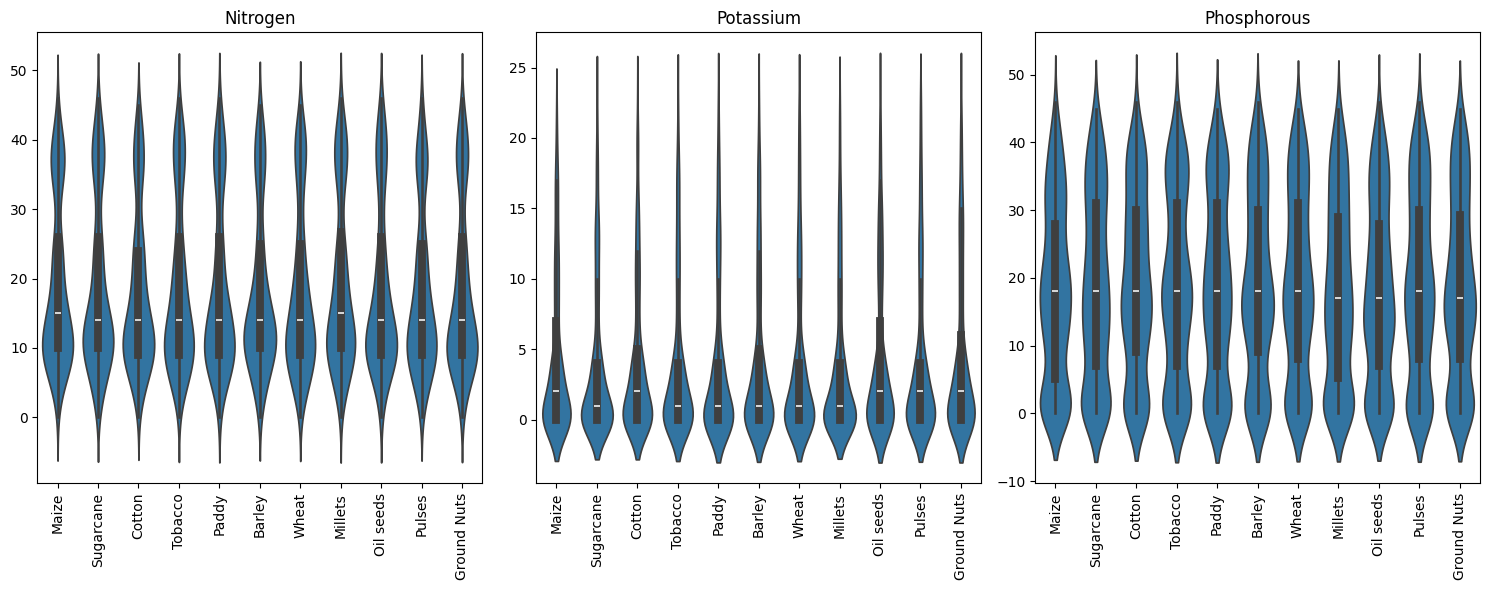

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

grouped = df.groupby(cats[1])

for i, j in enumerate([cats[0], cats[-1]]):
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    bar_labels(axes[i], 0, "center")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        sns.violinplot(df, x=cats[1], y=nums[index], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Classification algorithms performance in detecting soil and crop types

## Soil Type

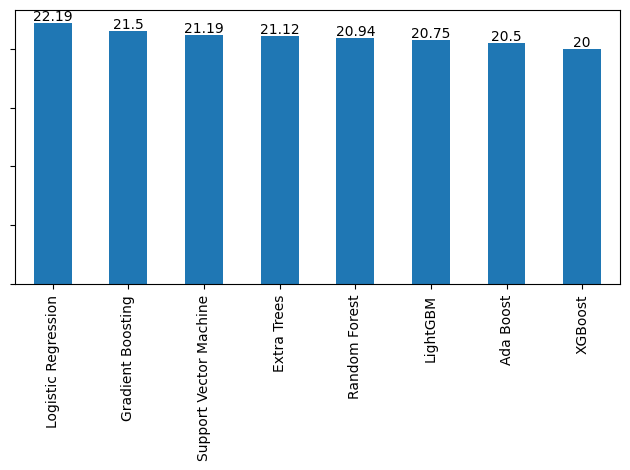

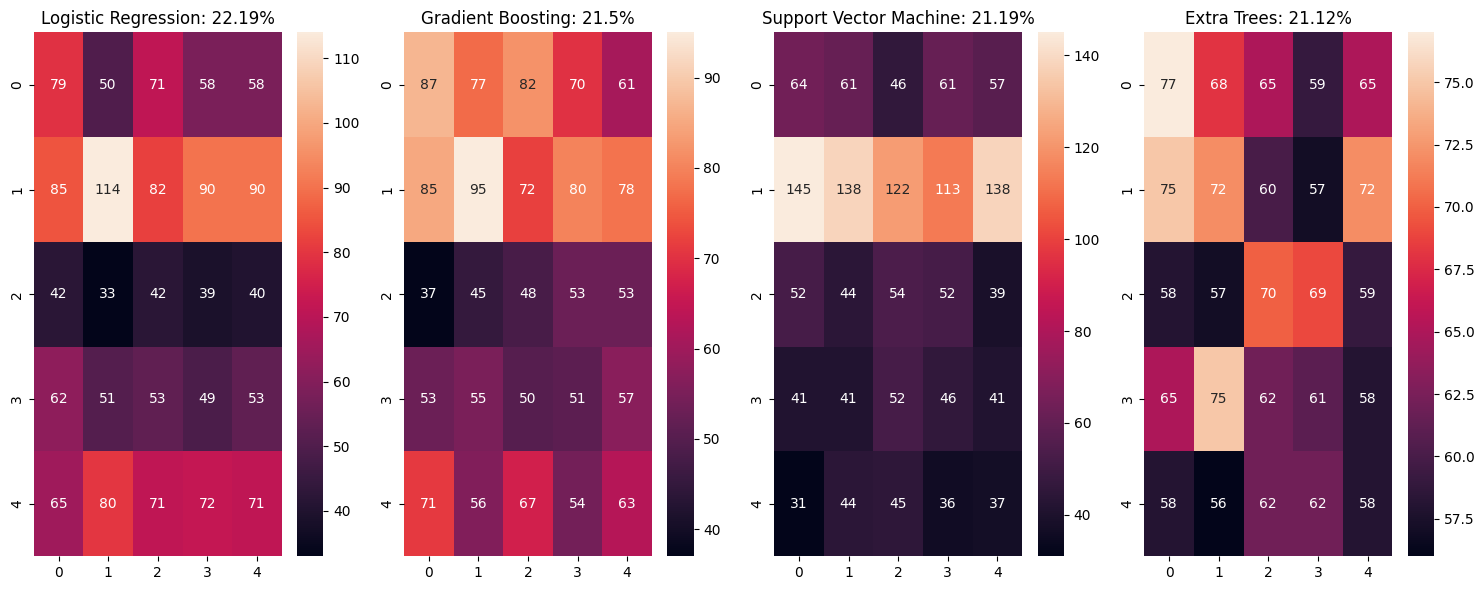

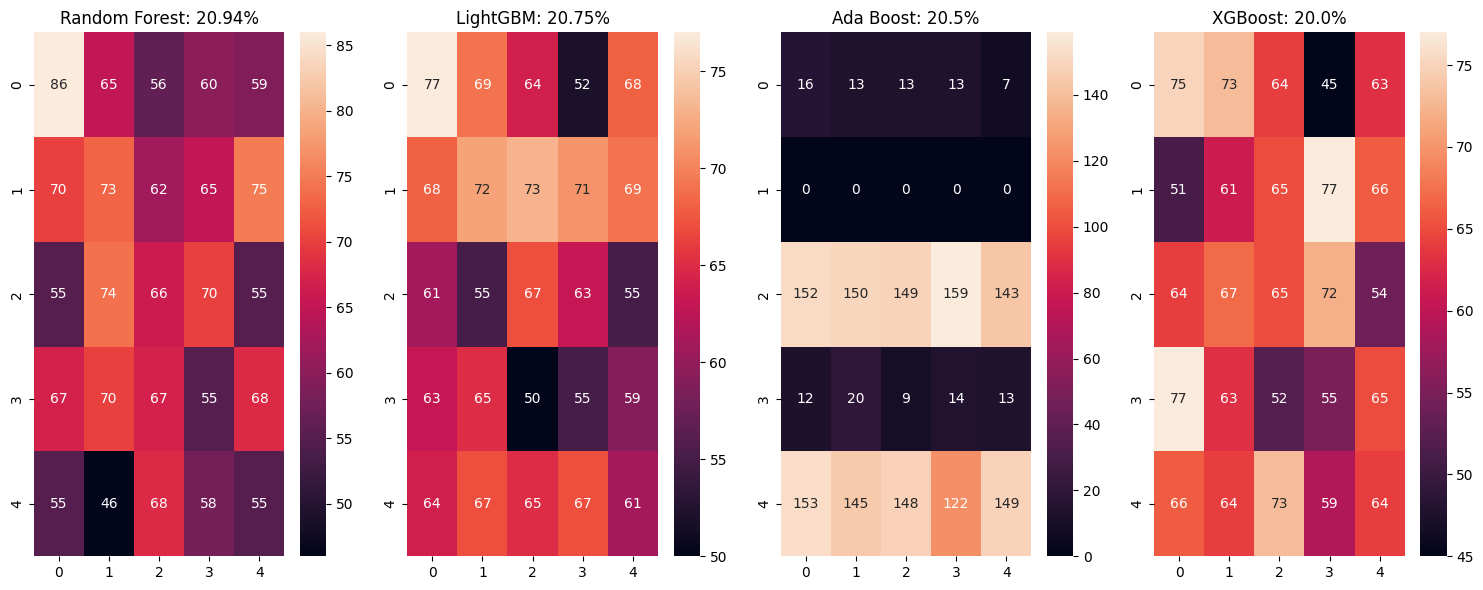

******************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.24      0.25      0.24       316
           1       0.35      0.25      0.29       461
           2       0.13      0.21      0.16       196
           3       0.16      0.18      0.17       268
           4       0.23      0.20      0.21       359

    accuracy                           0.22      1600
   macro avg       0.22      0.22      0.22      1600
weighted avg       0.24      0.22      0.23      1600




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.26      0.23      0.25       377
           1       0.29      0.23      0.26       410
           2       0.15      0.20      0.17       236
           3       0.17      0.19      0.18       266
           4       0.20      0.20      0.20       311

    accuracy                           0.21      1600
   macro avg       0.21     

In [9]:
for i in cats:
    df[i] = LabelEncoder().fit_transform(df[i].values)

x = df.drop(cats[0], axis=1).values
y = df[cats[0]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_classification()

## Crop type

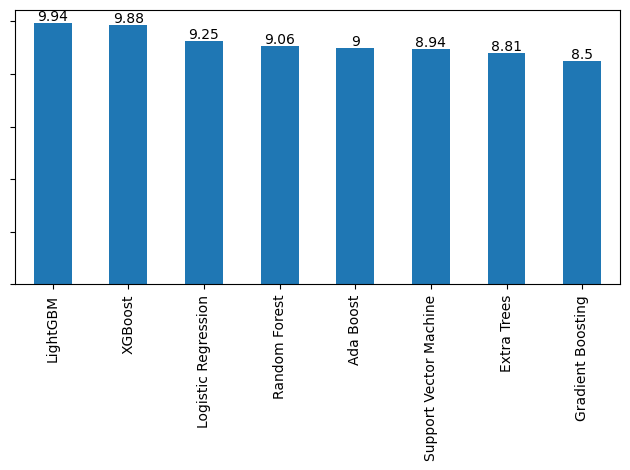

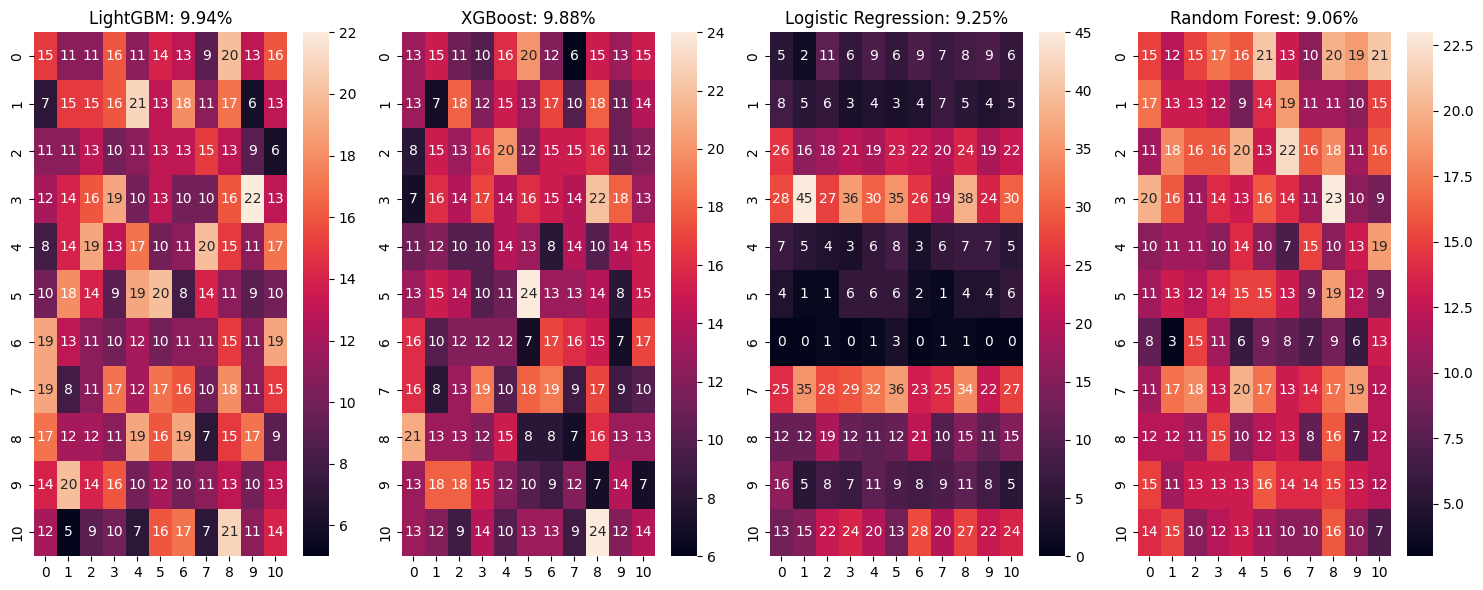

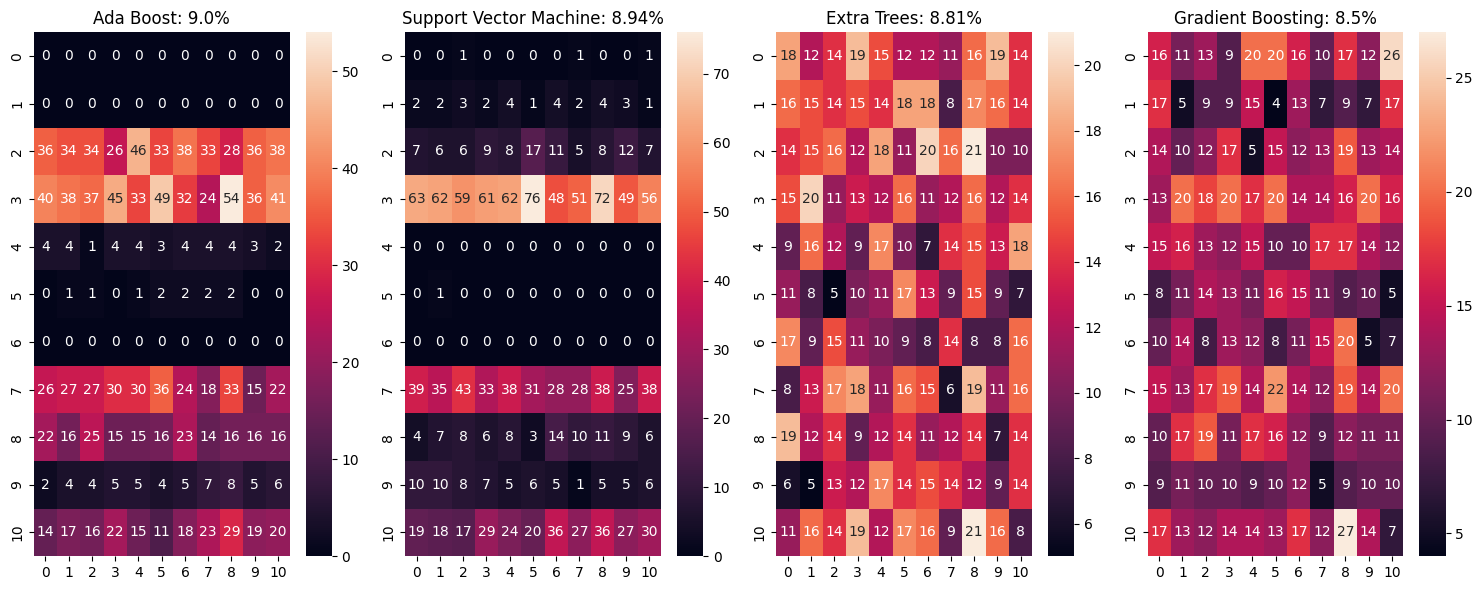

******************************
LightGBM
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       149
           1       0.11      0.10      0.10       152
           2       0.09      0.10      0.10       125
           3       0.13      0.12      0.13       155
           4       0.11      0.11      0.11       155
           5       0.13      0.14      0.14       142
           6       0.08      0.08      0.08       142
           7       0.08      0.06      0.07       154
           8       0.09      0.10      0.09       154
           9       0.08      0.07      0.07       143
          10       0.10      0.11      0.10       129

    accuracy                           0.10      1600
   macro avg       0.10      0.10      0.10      1600
weighted avg       0.10      0.10      0.10      1600




******************************
XGBoost
              precision    recall  f1-score   support

           0       0.09      0.09      0.09       

In [10]:
x = df.drop(cats[1], axis=1).values
y = df[cats[1]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_classification()